In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Задачи
Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

Сколько транзакций завершились ошибкой?

Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

Изучите представленный график. Помогите коллеге разобраться, есть ли в данных ошибка, или же всё хорошо.

Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

Описание данных

Имеются следующие данные:

date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
name – имя пользователя
transaction – статус транзакции
minute* – сколько минут прошло с начала дня
Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Вопрос: сколько в датасете пропущенных значений?

Задачи Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [16]:
df = pd.read_csv('C:/Users/79295/Desktop/GITHUB/Analytical-practice/datasets/transaction_data.csv')

In [17]:
df.shape

(5315, 3)

In [18]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [19]:
df.date = pd.to_datetime(df.date)

In [20]:
df.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

In [21]:
df.describe()

C:\Users\79295\AppData\Local\Temp\ipykernel_3580\3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692
first,2020-03-02 00:00:00,NaN,NaN
last,2020-03-02 01:29:05,NaN,NaN


In [23]:
df.isnull().sum()

date           0
name           0
transaction    0
dtype: int64

Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

In [34]:
df.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [59]:
transactions_values = df \
    .groupby('transaction', as_index=False) \
    .agg({"name":"count"}) \
    .rename(columns={"name":"transactions_count"}).sort_values(by = 'transactions_count',ascending=False)
transactions_values

,transaction,transactions_count
2,successfull,3692
0,cancelled,1619
1,error,4


In [60]:
# Строим барплот, по оси х - вид транзакции, по оси у - кол-во транзакций каждого вида

<AxesSubplot:xlabel='transaction', ylabel='transactions_count'>

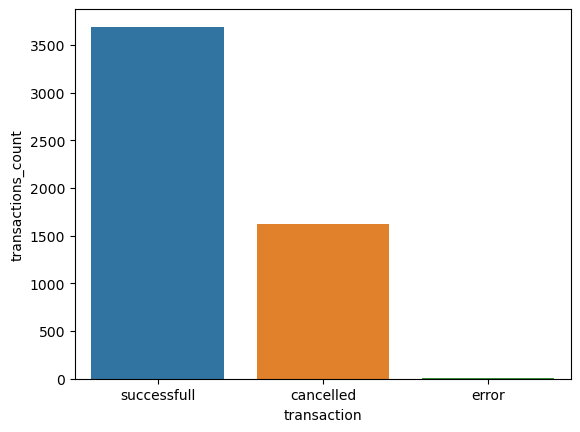

In [62]:
sns.barplot(data=transactions_values, x = 'transaction', y ='transactions_count')

Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

по оси x – число транзакций
по оси y – доля пользователей с таким числом транзакций

In [104]:
success_transactions = df[df.transaction == 'successfull'] \
    .groupby('name', as_index=False) \
    .agg({"date":"count"}) \
    .rename(columns={"date":"total_success_transactions"})
success_transactions.head()

,name,total_success_transactions
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


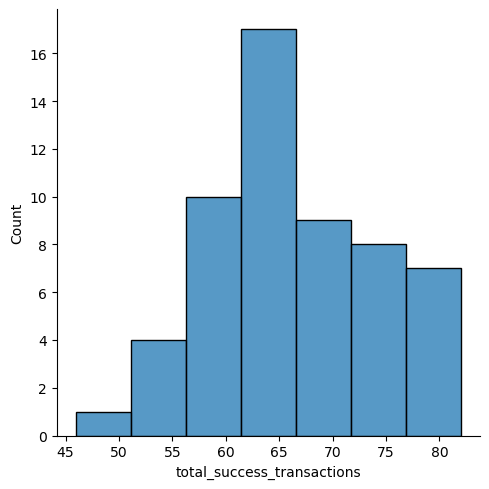

In [107]:
sns.displot(data = success_transactions, x = 'total_success_transactions')

In [111]:
# Для корректной визуализации выставим ширину ячейки = 1 :

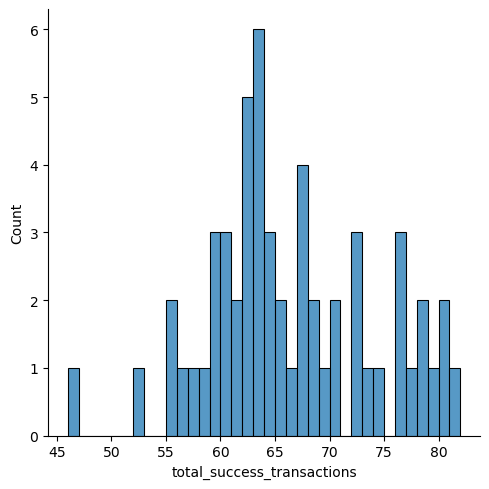

In [112]:
sns.displot(data = success_transactions, x = 'total_success_transactions',binwidth=1)

К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

столбцы – имена пользователей
строки – минута времени осуществления операции (minute)
значения – число совершённых операций

Пропущенные значения заполните нулями.

In [114]:
df_new = pd.read_csv('C:/Users/79295/Desktop/GITHUB/Analytical-practice/datasets/transaction_data_updated.csv')

In [116]:
df_new

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [119]:
df_filter = df_new.groupby(['name', 'minute'],as_index=False).transaction.count()
df_filter

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [130]:
# В сводной таблице pivot, строки -index, столбцы - columns, значения - values

In [131]:
df_filter.pivot(index = "minute", columns = 'name', values = 'transaction').fillna(0).head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [132]:
df_new.date = pd.to_datetime(df_new.date)
df_new["true_minute"] = df_new.date.dt.hour * 60 + df_new.date.dt.minute
df_new

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


In [136]:
df_filter1 = df_new.groupby(['name', 'true_minute'],as_index=False).transaction.count()
df_filter1

,name,true_minute,transaction
0,Ekaterina_Fedorova,0,1
1,Ekaterina_Fedorova,1,1
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,2
4,Ekaterina_Fedorova,4,2
...,...,...,...
3306,Vasilisa_Smirnova,82,2
3307,Vasilisa_Smirnova,85,1
3308,Vasilisa_Smirnova,86,1
3309,Vasilisa_Smirnova,87,2


In [141]:
true_df = df_filter1.groupby('true_minute',as_index=False).agg({"transaction":"sum"})
true_df

,true_minute,transaction
0,0,64
1,1,77
2,2,68
3,3,65
4,4,57
...,...,...
85,85,68
86,86,52
87,87,59
88,88,62


<AxesSubplot:xlabel='true_minute', ylabel='transaction'>

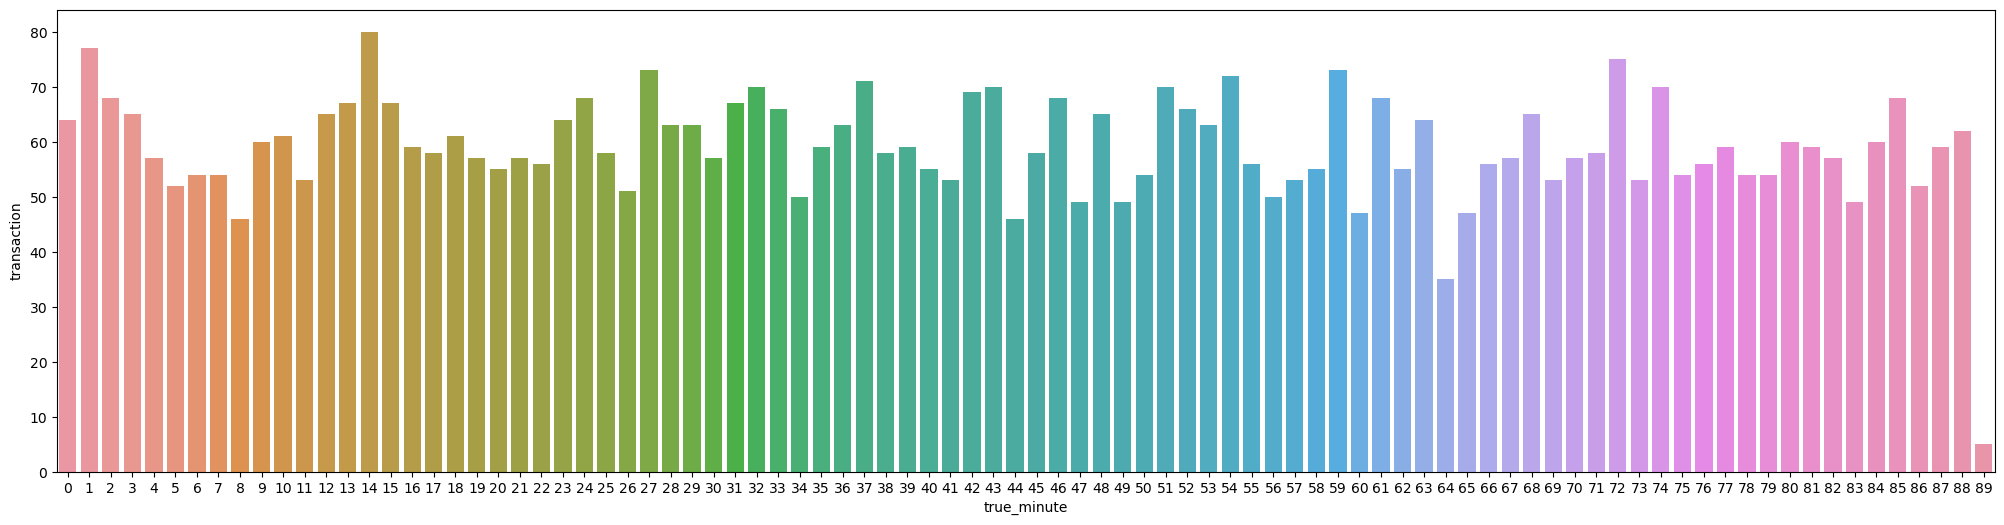

In [159]:
plt.figure(figsize=(25, 6))
sns.barplot(data = true_df, x = 'true_minute', y ='transaction')

In [160]:
# Распеределение успешных транзакций по минутно за первые полтора час работы 